# Enunciado:

#### Nombre: William Paredes
#### Materia: Simulacion

•	Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
◦	Se tiene los datos de las provincias recuperadas por COVID-19, los mismo que se encuentran en el siguiente link (https://public.flourish.studio/visualisation/1631922/?utm_source=showcase&utm_campaign=visualisation/1631922), con estos datos obtener los siguientes modelos:
▪	Generar un modelo matematicos(2) y probabilistico de prediccion de las personas recuperadas  en la proxima semana (7 dias despues y un mes despues).
▪	Finalmente, contrarestar los modelos matematicos y probabilistico y generar las siguientes conclusiones
•	Cual tiene una mejor prediccion.
•	Ventajas y desventajas de los modelos.
•	Comparacion entre los modelos aplicados.


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 54, 58, 63, 68, 71, 100, 100, 140, 140, 339, 368, 411, 501, 597, 696, 780, 838, 922, 1008, 1061, 1150, 1207, 1264, 1330, 1368, 1559, 1645, 1722, 1808, 1915, 2134, 3434, 3434, 3434, 3434, 3434, 3434, 3434, 3434, 3434, 3434, 3434, 3538, 3538, 3538, 3538, 3562]


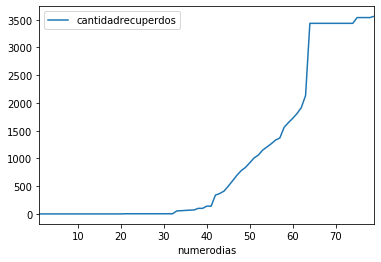

In [116]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Actualizar los datos (URL)
url = 'RecuperadosCovid.csv'
df = pd.read_csv(url)
df

df.plot(x ='numerodias', y='cantidadrecuperdos')

y_real = list(df.iloc [:, 1]) # Total casos recuperados
x_real = list(df.iloc [:, 0]) # Dias
print(x_real)
print(y_real)


# PARA UNA PRECCION DE 7 DIAS

In [117]:
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x_real).reshape(-1, 1) ,y_real)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [51.80691334]
Independent term: 
 -1047.7069133398247


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85]


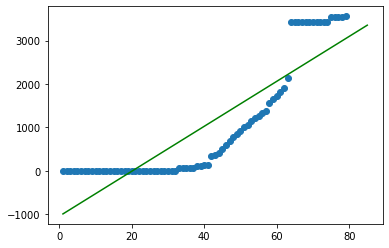

[-995.9        -944.09308666 -892.28617332 -840.47925998 -788.67234664
 -736.8654333  -685.05851996 -633.25160662 -581.44469328 -529.63777994
 -477.8308666  -426.02395326 -374.21703992 -322.41012658 -270.60321324
 -218.7962999  -166.98938656 -115.18247322  -63.37555988  -11.56864654
   40.2382668    92.04518014  143.85209348  195.65900682  247.46592016
  299.2728335   351.07974684  402.88666018  454.69357352  506.50048685
  558.30740019  610.11431353  661.92122687  713.72814021  765.53505355
  817.34196689  869.14888023  920.95579357  972.76270691 1024.56962025
 1076.37653359 1128.18344693 1179.99036027 1231.79727361 1283.60418695
 1335.41110029 1387.21801363 1439.02492697 1490.83184031 1542.63875365
 1594.44566699 1646.25258033 1698.05949367 1749.86640701 1801.67332035
 1853.48023369 1905.28714703 1957.09406037 2008.90097371 2060.70788705
 2112.51480039 2164.32171373 2216.12862707 2267.93554041 2319.74245375
 2371.54936709 2423.35628043 2475.16319377 2526.97010711 2578.77702045
 2630.

In [118]:
#Graficar
plt.scatter(x_real, y_real)
x_predic = np.array(range(1,86))
print(x_predic)
plt.plot(x_predic, regr.predict(x_predic.reshape(-1, 1)), color='green')
plt.show()
print(regr.predict(x_predic.reshape(-1, 1)))

5283.3539153315505


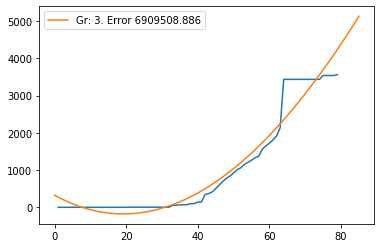

In [119]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(x_real, y_real)
sols = {}
for grado in range(3,4):
  z = np.polyfit(x_real, y_real, grado, full=True)
  sols[grado] = z
xp = np.array(range(0,86))
for grado, sol in sols.items():
  coefs, error, *_ = sol
  p = np.poly1d(coefs)
  print(p(86))  
  plt.plot(xp, p(xp), "-", label="Gr: %s. Error %.3f" % (grado, error) )
plt.legend()

In [120]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
filtro = df.iloc [:, 1] 
media = filtro.mean()
mediana = filtro.median()
print(media)
print(mediana)

1024.5696202531647
140.0


In [121]:
y_train=y_real
x_train=x_real
print(y_train[-1])
prediccion_siguiente = int(y_train[-1] + mediana)
print(prediccion_siguiente)

3562
3702


86
86


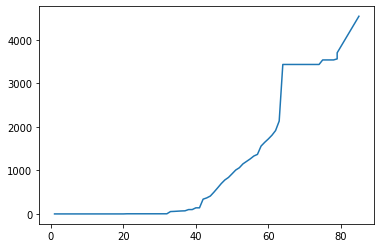

4542


In [122]:
for i in range(x_train[-1], x_train[-1]+7):
    x_train.append(i)
    y_train.append(int(y_train[-1] + mediana))
print(len(y_train[0:]))
print(len(x_train[0:]))
plt.plot(x_train[0:], y_train[0:])
plt.show()
print(y_train[-1])


# PARA UNA PRECCION DE 1 MES

Coefficients: 
 [56.59900195]
Independent term: 
 -1180.7636426516037
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108]


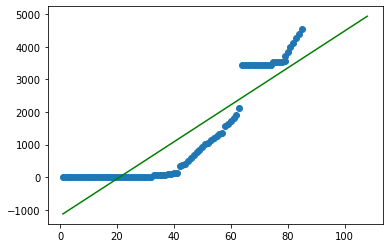

[-1124.16464071 -1067.56563876 -1010.96663681  -954.36763487
  -897.76863292  -841.16963097  -784.57062903  -727.97162708
  -671.37262513  -614.77362319  -558.17462124  -501.57561929
  -444.97661735  -388.3776154   -331.77861345  -275.17961151
  -218.58060956  -161.98160762  -105.38260567   -48.78360372
     7.81539822    64.41440017   121.01340212   177.61240406
   234.21140601   290.81040796   347.4094099    404.00841185
   460.6074138    517.20641574   573.80541769   630.40441963
   687.00342158   743.60242353   800.20142547   856.80042742
   913.39942937   969.99843131  1026.59743326  1083.19643521
  1139.79543715  1196.3944391   1252.99344105  1309.59244299
  1366.19144494  1422.79044689  1479.38944883  1535.98845078
  1592.58745272  1649.18645467  1705.78545662  1762.38445856
  1818.98346051  1875.58246246  1932.1814644   1988.78046635
  2045.3794683   2101.97847024  2158.57747219  2215.17647414
  2271.77547608  2328.37447803  2384.97347997  2441.57248192
  2498.17148387  2554.77

In [123]:
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x_real).reshape(-1, 1) ,y_real)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio#Graficar
plt.scatter(x_real, y_real)
x_predic = np.array(range(1,109))
print(x_predic)
plt.plot(x_predic, regr.predict(x_predic.reshape(-1, 1)), color='green')
plt.show()
print(regr.predict(x_predic.reshape(-1, 1)))

7376.62772998694


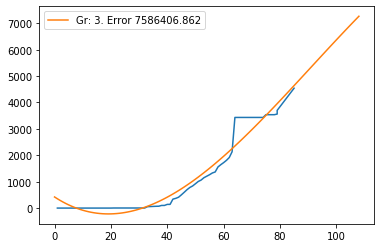

In [124]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(x_real, y_real)
sols = {}
for grado in range(3,4):
  z = np.polyfit(x_real, y_real, grado, full=True)
  sols[grado] = z
xp = np.array(range(0,109))
for grado, sol in sols.items():
  coefs, error, *_ = sol
  p = np.poly1d(coefs)
  print(p(109))  
  plt.plot(xp, p(xp), "-", label="Gr: %s. Error %.3f" % (grado, error) )
plt.legend()

In [125]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
filtro = df.iloc [:, 1] 
media = filtro.mean()
mediana = filtro.median()
print(media)
print(mediana)

1024.5696202531647
140.0


In [126]:
y_train2=y_real
x_train2=x_real
print(y_train2[-1])
prediccion_siguiente2 = int(y_train2[-1] + mediana)
print(prediccion_siguiente2)

4542
4682


116
116


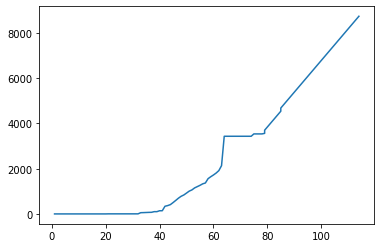

8742


In [127]:
for i in range(x_train2[-1], x_train2[-1]+30):
    x_train2.append(i)
    y_train2.append(int(y_train2[-1] + mediana))
print(len(y_train2[0:]))
print(len(y_train2[0:]))
plt.plot(x_train2[0:], y_train2[0:])
plt.show()
print(y_train2[-1])

▪Generar un modelo matematicos(2) y probabilistico de prediccion de las personas recuperadas  en la proxima semana (7 dias despues y un mes despues).

# datos

 Modelo      |    7 dias   |    1 mes

LINEAL                      |          3355      |      4931

POLINOMIAL                  |             5283     |       7376

PROBABILIDAD            |             4542        |    8742


▪	Finalmente, contrarestar los modelos matematicos y probabilistico y generar las siguientes conclusiones
    •	Cual tiene una mejor prediccion.
    
            Entre todos los modelos el que tiene una mejor tasa de probalibilidad es el polinomial  ya que esta es la que mejior se adapto a los datos con una predccion de 7376  
    
    •	Ventajas y desventajas de los modelos.
    
        ventajas lineal
            Facilita la gestión del desarrollo
            Es menos propenso al sobreajuste
            .
        desventajas lineal
            No se puede modelar relaciones complejas.
            Puede sufrir con valores atípicos
            
        ventajas polinomial
            Trabaja con grandes muestras.
            Ideal para datos no lineales.
        
        desventajas polinomial
            requiere de bvarias pruebas hasta dar con el grado correcto
            
        ventajas probabilistico
            Calculo rápido de medidas y varianzas.
            Existen paquetes informáticos para analizar datos.
        
        desventajas probabilistico
            Se requiere un listado completo de toda la población.
            Existe un margen de error
                 
    
    •	Comparacion entre los modelos aplicados.
    haciendo una comparacion entre los modelos podemos decir que el modelo ganador es el polinomial ya que como podemos ver los datos no son lineales y se adaptan mejor al datos y sus prediccion ser mejor


# Segunda Parte
•	Posteriormente se debe seguir un procesos para la reinsercion laboral el mismo que se detalla a continuacion:
   
   ◦	La persona se tiene que seleccionar aleatoriamente un tipo de actividad.
    
    ◦	La persona recuperada tiene que descansar de 2 – 7 dias dentro del hogar.
    
    ◦	La persona tiene que empezar con teletrabajo el mismo que tiene el siguiente rango de dias 5 - 14 dias.
    
    ◦	La persona se tiene que integrar al trabajo presencial  pero para ello debe pasar la observacion y valoracion medica  que se compone de las siguientes reglas:
        
        ▪	La persona tiene una probabilidad del 70% para reintegrarse nuevamente a sus labores presenciales.
        
        ▪	En caso de no pasar (30%) la valoracion tiene que regresear al teletrabajo por 3-7 dias  y repetir el proceso de valoracion.
    
    ◦	Finalmente la persona se reintegra y continua sus labores.


Simulacion Recuperados


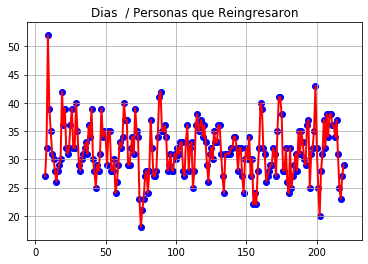

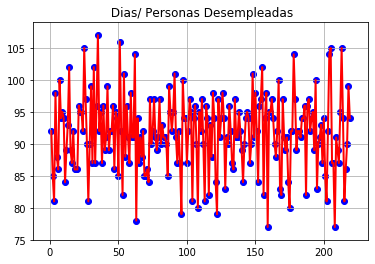

In [136]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline


#PARAMETROS
EmpresaES = 1
Empresa_Consultorios = 100
recuperados = 7376
TASA_CRECIMIENTO = 140
TIEMPO_Descanso =  5 
DIAS_teletrabajo = 10
DIAS_teletrabajo_reicide = 4
DIAS_SIMULACION = 220
tiempo_evaluacion=1


#Diccionario para almacenar los resultados
reingresototal={}
reingresoAlimentacion={}
reingresoVentas={}
reingresorestaurante={}
reingresoviajes={}
reingresohoteles={}
desempleadostotal={}



class Empresa(object):
    #constructor
    def __init__(self, env, num_lab, name):
            self.env = env
            self.num_lab=num_lab
            self.lab=simpy.Resource(env, num_lab)
            self.name = name
    def ingresar_teletrabajo(self,paciente):
        yield self.env.timeout(random.randint(DIAS_teletrabajo-5, DIAS_teletrabajo+5))
        
    def ingresar_teletrabajo_reicide(self,paciente):
        yield self.env.timeout(random.randint(DIAS_teletrabajo_reicide-3, DIAS_teletrabajo_reicide+3))
        
    def ingresar_descanso(self, paciente):
        yield self.env.timeout(random.randint(TIEMPO_Descanso-5, TIEMPO_Descanso+5))
    
    def ingresar_evaluacion(self, paciente):
        yield self.env.timeout(tiempo_evaluacion)
        

def llegada_paciente(env, Empresa, paciente):
    arrive = env.now
    estado = random.randint(1,100)
    if (estado <= 35):
        yield env.process(Empresa.ingresar_descanso(paciente))
        tipoempleo=random.randint(1,5)
        if (tipoempleo == 1):
            yield env.process(Empresa.ingresar_teletrabajo(paciente))
            while True:
                with Empresa.lab.request() as labs:
                    dias_esperando = random.randint(1,220)
                    requerimiento = yield labs | env.timeout(dias_esperando)
                    if labs in requerimiento:
                        yield env.process(Empresa.ingresar_evaluacion(paciente))
                        evaluacion = random.randint(1,100)
                        if(evaluacion<=30):
                            yield env.process(Empresa.ingresar_teletrabajo_reicide(paciente))
                        else:
                            reingresototal[env.now] = reingresototal[env.now] + 1 if env.now in reingresototal else  1
                            reingresoAlimentacion[env.now] = reingresoAlimentacion[env.now] + 1 if env.now in reingresoAlimentacion else  1
                            break
    
        if (tipoempleo == 2):
            yield env.process(Empresa.ingresar_teletrabajo(paciente))
            while True:
                with Empresa.lab.request() as labs:
                    dias_esperando = random.randint(1,220)
                    requerimiento = yield labs | env.timeout(dias_esperando)
                    if labs in requerimiento:
                        yield env.process(Empresa.ingresar_evaluacion(paciente))
                        evaluacion = random.randint(1,100)
                        if(evaluacion<=30):
                            yield env.process(Empresa.ingresar_teletrabajo_reicide(paciente))
                        else:
                            reingresototal[env.now] = reingresototal[env.now] + 1 if env.now in reingresototal else  1
                            reingresoVentas[env.now] = reingresoVentas[env.now] + 1 if env.now in reingresoVentas else  1
                            break
        if (tipoempleo == 3):
            yield env.process(Empresa.ingresar_teletrabajo(paciente))
            while True:
                with Empresa.lab.request() as labs:
                    dias_esperando = random.randint(1,220)
                    requerimiento = yield labs | env.timeout(dias_esperando)
                    if labs in requerimiento:
                        yield env.process(Empresa.ingresar_evaluacion(paciente))
                        evaluacion = random.randint(1,100)
                        if(evaluacion<=30):
                            yield env.process(Empresa.ingresar_teletrabajo_reicide(paciente))
                        else:
                            reingresototal[env.now] = reingresototal[env.now] + 1 if env.now in reingresototal else  1
                            reingresorestaurante[env.now] = reingresorestaurante[env.now] + 1 if env.now in reingresorestaurante else  1
                            break
        if (tipoempleo == 4):
            yield env.process(Empresa.ingresar_teletrabajo(paciente))
            while True:
                with Empresa.lab.request() as labs:
                    dias_esperando = random.randint(1,220)
                    requerimiento = yield labs | env.timeout(dias_esperando)
                    if labs in requerimiento:
                        yield env.process(Empresa.ingresar_evaluacion(paciente))
                        evaluacion = random.randint(1,100)
                        if(evaluacion<=30):
                            yield env.process(Empresa.ingresar_teletrabajo_reicide(paciente))
                        else:
                            reingresototal[env.now] = reingresototal[env.now] + 1 if env.now in reingresototal else  1
                            reingresoviajes[env.now] = reingresoviajes[env.now] + 1 if env.now in reingresoviajes else  1
                            break
        if (tipoempleo == 5):
            yield env.process(Empresa.ingresar_teletrabajo(paciente))
            while True:
                with Empresa.lab.request() as labs:
                    dias_esperando = random.randint(1,220)
                    requerimiento = yield labs | env.timeout(dias_esperando)
                    if labs in requerimiento:
                        yield env.process(Empresa.ingresar_evaluacion(paciente))
                        evaluacion = random.randint(1,100)
                        if(evaluacion<=30):
                            yield env.process(Empresa.ingresar_teletrabajo_reicide(paciente))
                        else:
                            reingresototal[env.now] = reingresototal[env.now] + 1 if env.now in reingresototal else  1
                            reingresohoteles[env.now] = reingresohoteles[env.now] + 1 if env.now in reingresohoteles else  1
                            break
    
    else:
        desempleadostotal[env.now] = desempleadostotal[env.now] + 1 if env.now in desempleadostotal else  1


    

def ejecutar(env, tasa_crecimiento, recuperados):
    EmpresaA = Empresa(env,Empresa_Consultorios, "A")
    for i in range(recuperados):
        asignar_Empresa(env, EmpresaA, i)
    paciente = recuperados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            paciente += 1
            asignar_Empresa(env, EmpresaA, paciente)
                
def asignar_Empresa(env, EmpresaA, paciente):
    empre_esc = 1
    if (empre_esc == 1):
        env.process(llegada_paciente(env, EmpresaA, paciente))

print("Simulacion Recuperados")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO, recuperados))
env.run(until=DIAS_SIMULACION)



datos=sorted(reingresototal.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
pp.plot(x[1:],y[1:],linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x[1:],y[1:],color='blue') # Dibujamos los puntos (x,y)
pp.title("Dias  / Personas que Reingresaron")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

if (desempleadostotal):
    datos=sorted(desempleadostotal.items()) # Ordenamos los datos
    x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
    pp.plot(x[1:],y[1:],linewidth=2,color='red') #Dibujamos las lineas
    pp.scatter(x[1:],y[1:],color='blue') # Dibujamos los puntos (x,y)
    pp.title(" Dias/ Personas Desempleadas")
    pp.grid(True) #Generamos una cuadricula
    pp.show() #Mostramos el grafico

<function matplotlib.pyplot.show(*args, **kw)>

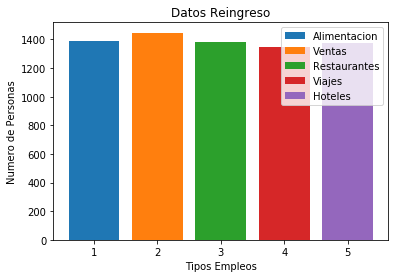

In [135]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5]
y=[sum(reingresoAlimentacion.values()),sum(reingresoVentas.values()),sum(reingresorestaurante.values()),sum(reingresoviajes.values()),sum(reingresohoteles.values())]
fig, ax=plt.subplots()
ax.bar(x[0],y[0],label="Alimentacion")
ax.bar(x[1],y[1],label="Ventas")
ax.bar(x[2],y[2],label="Restaurantes")
ax.bar(x[3],y[3],label="Viajes")
ax.bar(x[4],y[4],label="Hoteles")

ax.legend(("Alimentacion","Ventas","Restaurantes","Viajes","Hoteles"))
plt.title("Datos Reingreso")
plt.xlabel("Tipos Empleos")
plt.ylabel("Numero de Personas")
plt.show

Referencias:

[1] : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6291769/
